In [1]:
import gym
import robo_gym
from robo_gym.wrappers.exception_handling import ExceptionHandling

import numpy as np

In [2]:
target_machine_ip = 'localhost' # or other machine 'xxx.xxx.xxx.xxx'

# initialize environment
env = gym.make('CubeRoomOnNavigationStack-v0', ip=target_machine_ip, gui=True)
env = ExceptionHandling(env)

state = env.reset(**{'new_room': True, 'new_agent_pose': True})

Starting new Robot Server | Tentative 1
<class 'server_manager_pb2.RobotServer'>
True 
Successfully started Robot Server at localhost:46025
reset!!!!


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
# state = env.reset(**{'new_room': False, 'new_agent_pose': True})
print(state)
print(env.observation_space)
print(env.map_size)
print(env.observation_space['agent_pose'].high)
print(env.observation_space['occupancy_grid'].low)

{'occupancy_grid': array([-1., -1., -1., ..., -1., -1., -1.], dtype=float32), 'agent_pose': array([0., 0., 1., 0., 1.])}
Dict(agent_pose:Box(-1.0, inf, (5,), float32), occupancy_grid:Box(-1.0, 100.0, (16384,), float32))
128
[inf  1.  1.  1.  1.]
[-1. -1. -1. ... -1. -1. -1.]


In [7]:
env.action_space.low, env.action_space.high

(array([-1., -1., -1.], dtype=float32), array([1., 1., 1.], dtype=float32))

In [ ]:
pose_low = env.observation_space['agent_pose'].low
pose_high = env.observation_space['agent_pose'].high
print(f"space of observation[agent_pose]: \n\tlow: {pose_low}\n\thigh: {pose_high}:")

In [3]:
action = [0.1,0.5,0]
state, _, _, _ = env.step(action)
print(state['agent_pose'], env.agent_pose)

[ 1.60380367 -1.53926517 -2.53370905] (-0.09934573620557785, -0.3786543011665344, 0.9617317318916321)


In [4]:
print(env.is_done_action, env.is_reached_goal, env.time_taken_action)
print(env.goal_pose, env.agent_pose)

True False 41.44788837432861
(0.7253075691773254, -2.465178064226705, -2.7877445220947266) (-0.09934573620557785, -0.3786543011665344, 0.9617317318916321)


{-1: 61334, 0: 3733, 100: 469}
{0: 469, 128: 61334, 255: 3733}


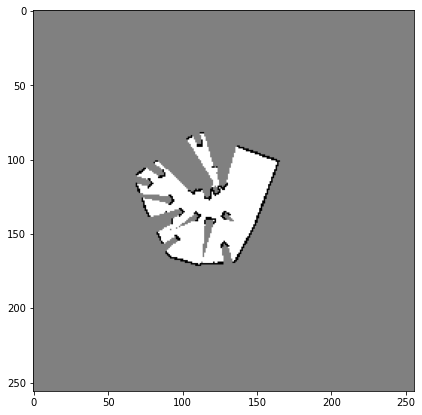

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 7,7

o = np.array(state['occupancy_grid'], dtype=np.int16)
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))

o[o == 0] = 255
o[o == 100] = 0
o[o == -1] = 128
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))
img = o.reshape((256,256)).T
plt.imshow(img, cmap='gray') 

(128, 128)


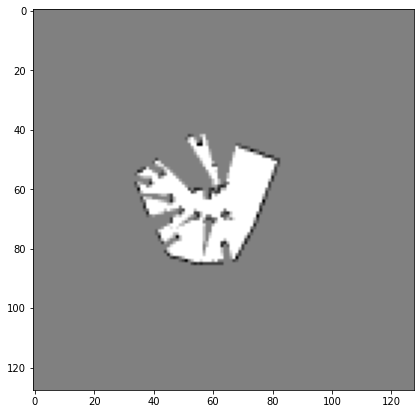

In [6]:
from skimage.transform import resize, rescale

resized = rescale(img, 0.5, anti_aliasing=False)
print(resized.shape)
plt.imshow(resized, cmap='gray')

{0: 60295, 255: 5241}


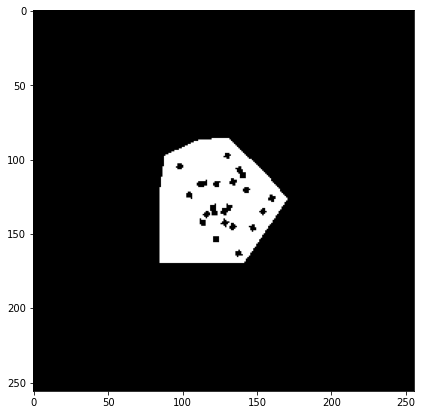

In [7]:
o = np.array(env.map_trueth, dtype=np.int16)
unique, counts = np.unique(o, return_counts=True)
print(dict(zip(unique, counts)))

img = o.reshape((256,256)).T
plt.imshow(img, cmap='gray') 